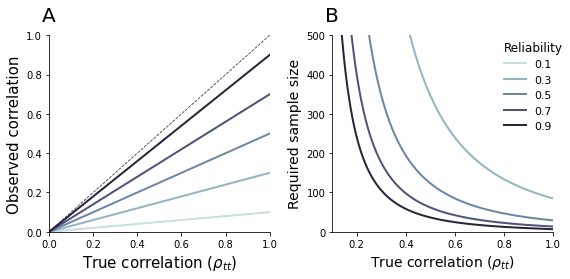

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from scipy.stats import norm
ROOT_DIR = dirname(os.path.realpath('__file__'))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define measure parameters.
rho_xx = rho_yy = np.linspace(0.1,0.9,5)   # Task measure reliability
rho_tt = np.linspace(1e-6,1,1001)          # Task measure correlation
 
## Define power parameters.
alpha = 0.05                               # Significance level
beta = 0.20                                # Inverse power level
    
## Define plotting paramters.
palette = sns.color_palette("ch:start=.2,rot=-.3", n_colors=rho_xx.size, desat=0.8)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel A: Correlation by reliability.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

## Compute observed correlations.
obs = np.outer(rho_tt, np.sqrt(rho_xx * rho_yy))

## Plot observed correlations.
for y, color, label in zip(obs.T, palette, rho_xx):
    ax1.plot(rho_tt, y, lw=2, color=color, label='%0.1f' %label)
    
## Plot identity line.
ax1.plot([0,1], [0,1], lw=0.8, color='k', linestyle='--', alpha=0.8, zorder=-1)
    
## Add detail.
ax1.set(xlim=(0,1), ylim=(0,1))
ax1.set_xlabel(r'True correlation $(\rho_{tt})$', fontsize=15)
ax1.set_ylabel(r'Observed correlation', fontsize=15)
ax1.annotate('A', (0,0), (0,1.05), 'axes fraction', ha='center', va='bottom', fontsize=20)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel B: Required sample size.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Compute required sample size.
Za = norm.ppf(1 - alpha / 2)
Zb = norm.ppf(1 - beta)
C = 0.5 * np.log((1 + obs) / (1 - obs))
N = np.square((Za + Zb) / C) + 3 

## Plot required sample size.
for y, color, label in zip(N.T, palette, rho_xx):
    ax2.plot(rho_tt, y, lw=2, color=color, label='%0.1f' %label)
    
## Add detail.
ax2.set(xlim=(0.1,1), ylim=(0,500))
ax2.set_xlabel(r'True correlation $(\rho_{tt})$', fontsize=14)
ax2.set_ylabel(r'Required sample size', fontsize=14)
ax2.annotate('B', (0,0), (0,1.05), 'axes fraction', ha='center', va='bottom', fontsize=20)

## Add legend.
legend = ax2.legend(loc=1, bbox_to_anchor=(1.07,1), frameon=False, fontsize=11, 
                   title=r'Reliability', borderpad=0)
plt.setp(legend.get_title(), fontsize=12)
legend._legend_box.align = "left"

sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'fig01.png'), transparent=True, dpi=100)